In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_excel('/kaggle/input/pwc-call-centre-analysis/01 Call-Center-Dataset.xlsx')

In [2]:
# show the first 5 rows
df.head()

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating
0,ID0001,Diane,2021-01-01,09:12:58,Contract related,Y,Y,109.0,00:02:23,3.0
1,ID0002,Becky,2021-01-01,09:12:58,Technical Support,Y,N,70.0,00:04:02,3.0
2,ID0003,Stewart,2021-01-01,09:47:31,Contract related,Y,Y,10.0,00:02:11,3.0
3,ID0004,Greg,2021-01-01,09:47:31,Contract related,Y,Y,53.0,00:00:37,2.0
4,ID0005,Becky,2021-01-01,10:00:29,Payment related,Y,Y,95.0,00:01:00,3.0


In [3]:
# show the last 5 rows
df.tail()

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating
4995,ID4996,Jim,2021-03-31,16:37:55,Payment related,Y,Y,22.0,00:05:40,1.0
4996,ID4997,Diane,2021-03-31,16:45:07,Payment related,Y,Y,100.0,00:03:16,3.0
4997,ID4998,Diane,2021-03-31,16:53:46,Payment related,Y,Y,84.0,00:01:49,4.0
4998,ID4999,Jim,2021-03-31,17:02:24,Streaming,Y,Y,98.0,00:00:58,5.0
4999,ID5000,Diane,2021-03-31,17:39:50,Contract related,N,N,NaN,NaN,NaN


In [4]:
# count the number of unique values in each column
df.nunique()

Call Id                       5000
Agent                            8
Date                            90
Time                           375
Topic                            5
Answered (Y/N)                   2
Resolved                         2
Speed of answer in seconds     116
AvgTalkDuration                391
Satisfaction rating              5
dtype: int64

In [5]:
# drop duplicated rows
df = df.drop_duplicates()

In [6]:
# see the number of missing values in each column
df.isnull().sum()

Call Id                         0
Agent                           0
Date                            0
Time                            0
Topic                           0
Answered (Y/N)                  0
Resolved                        0
Speed of answer in seconds    946
AvgTalkDuration               946
Satisfaction rating           946
dtype: int64

So we can find some missing values here

In [7]:
#drop missing values
df = df.dropna()

In [8]:
#descriptive statistics
df.describe()

,Speed of answer in seconds,Satisfaction rating
count,4054.000000,4054.000000
mean,67.520720,3.403552
std,33.592872,1.212220
min,10.000000,1.000000
25%,39.000000,3.000000
50%,68.000000,3.000000
75%,97.000000,4.000000
max,125.000000,5.000000


In [9]:
# get info of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4054 entries, 0 to 4998
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Call Id                     4054 non-null   object 
 1   Agent                       4054 non-null   object 
 2   Date                        4054 non-null   object 
 3   Time                        4054 non-null   object 
 4   Topic                       4054 non-null   object 
 5   Answered (Y/N)              4054 non-null   object 
 6   Resolved                    4054 non-null   object 
 7   Speed of answer in seconds  4054 non-null   float64
 8   AvgTalkDuration             4054 non-null   object 
 9   Satisfaction rating         4054 non-null   float64
dtypes: float64(2), object(8)
memory usage: 348.4+ KB


In [10]:
# Convert object datatype to time dtype
df['AvgTalkDuration'] = pd.to_datetime(df['AvgTalkDuration'], format='%H:%M:%S').dt.time
# use lambda to caculate total_s
df['TotalSeconds'] = df['AvgTalkDuration'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)
df['TotalSeconds']

0       143
1       242
2       131
3        37
4        60
       ... 
4990    386
4995    340
4996    196
4997    109
4998     58
Name: TotalSeconds, Length: 4054, dtype: int64

Explore relationship between 'AvgTalkDuration' and 'Satisfaction rating'

In [11]:
#Calculate the correlation between numeric columns.
df.corr()

/tmp/ipykernel_20/2389556100.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Speed of answer in seconds,Satisfaction rating,TotalSeconds
Speed of answer in seconds,1.000000,0.000952,-0.002898
Satisfaction rating,0.000952,1.000000,0.000143
TotalSeconds,-0.002898,0.000143,1.000000


Hence AvgTalkDuration has no correlation with Satisfaction rating.

a correlation coefficient of 0.000143 suggests a very weak positive correlation or no meaningful linear relationship between the variables being compared. The value is very close to 0, which implies that there is little to no linear pattern between the variables.

In [12]:
# retrieve the list of column labels
df.columns

Index(['Call Id', 'Agent', 'Date', 'Time', 'Topic', 'Answered (Y/N)',
       'Resolved', 'Speed of answer in seconds', 'AvgTalkDuration',
       'Satisfaction rating', 'TotalSeconds'],
      dtype='object')

# **Based on the above columns, we seek to create metrics for the call centre dashboard:**

df.drop_duplicates()

In [13]:
#Total Calls: Count the total number of calls made to the call center.
len(df)

4054

In [14]:
#Total Unique Callers: Count the number of unique callers who have contacted the call center.
df['Call Id'].nunique()

4054

In [15]:
#Total Calls Resolved
len(df[df['Resolved']== 'Y'])

3646

In [16]:
#Call Resolution Rate: Percentage of calls that were successfully resolved.
Call_Resolution_Rate = len(df[df['Resolved']== 'Y'])/len(df)*100
# Round to 2 decimal places
Call_Resolution_Rate = round(Call_Resolution_Rate,2)
# Format as a string with 2 decimal places and %
Call_Resolution_Rate = f"{Call_Resolution_Rate:.2f}%"
Call_Resolution_Rate

'89.94%'

In [17]:
#Average Call Duration (/s): Calculate the average duration of calls.
Average_Call_Duration = df['TotalSeconds'].mean()
Average_Call_Duration = round (Average_Call_Duration,2)
Average_Call_Duration

224.92

In [18]:
#Total Abandoned Calls: Count the number of calls that were abandoned by callers before being answered.

len(df[df['Answered (Y/N)']=='N'])

0

In [19]:
#Abandonment Rate: Percentage of calls that were abandoned.

len(df[df['Answered (Y/N)']=='N'])/len(df)

0.0

In [20]:
#Average Hold Time: Calculate the average time callers spend on hold before their calls are answered.
average_hold_time = df[df['Answered (Y/N)'] == 'Y']['Speed of answer in seconds'].mean()
average_hold_time = round(average_hold_time,2)
average_hold_time

67.52

In [21]:
#Service Level Agreement (SLA) Adherence: Measure the percentage of calls answered within a certain timeframe, e.g., 80% of calls answered within 20 seconds.
#Assume the timeframe threshold is 60
Sla_threshold = 90
SLA_Adherence = len(df[df['Speed of answer in seconds']<=Sla_threshold])/len(df)
SLA_Adherence = round(SLA_Adherence,2)
SLA_Adherence = f"{SLA_Adherence:.2f}%"
SLA_Adherence

'0.70%'

In [22]:
#Caller Satisfaction: Calculate the average caller satisfaction score.
Caller_Satisfaction = df['Satisfaction rating'].mean()
Caller_Satisfaction = round(Caller_Satisfaction,2)
Caller_Satisfaction

3.4

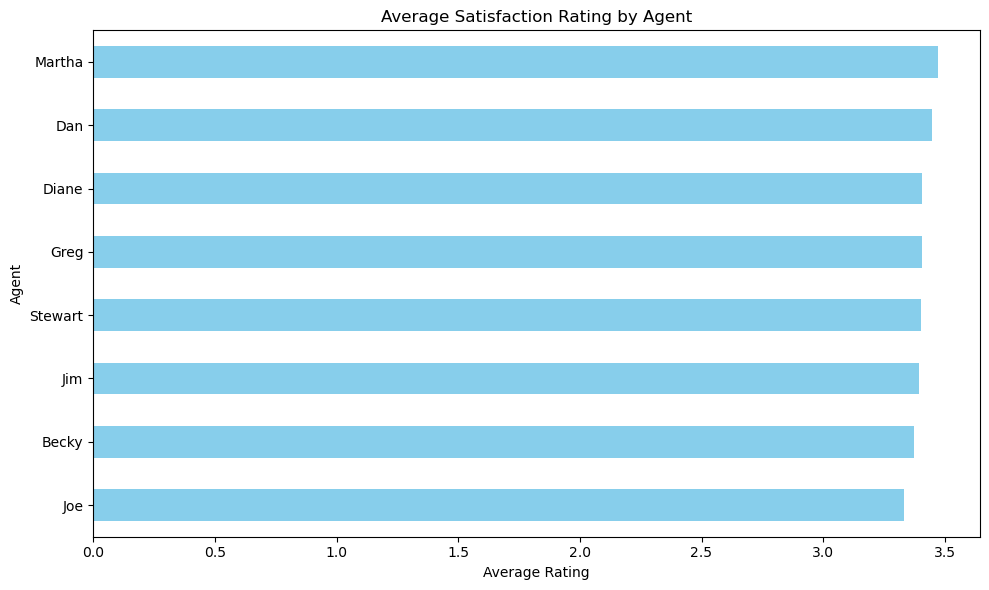

In [23]:
# Group by agent and get average satisfaction rating
avg_satisfaction = df.groupby('Agent')['Satisfaction rating'].mean().sort_values()

# Plot
plt.figure(figsize=(10,6))
avg_satisfaction.plot(kind='barh', color='skyblue')
plt.title('Average Satisfaction Rating by Agent')
plt.xlabel('Average Rating')
plt.ylabel('Agent')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

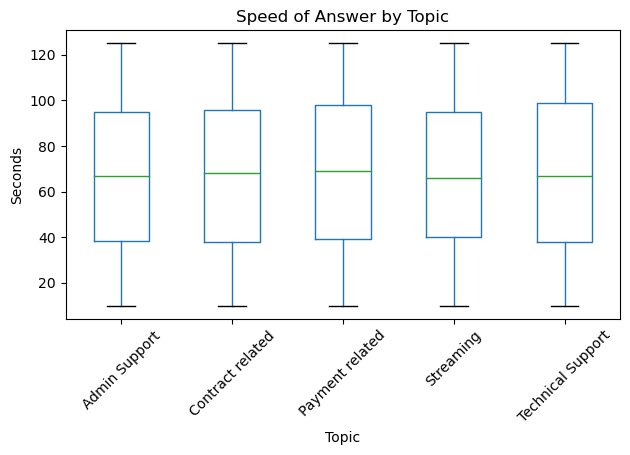

In [24]:
# Plot boxplot to compare answer speeds across topics
plt.figure(figsize=(12,6))
df.boxplot(column='Speed of answer in seconds', by='Topic', grid=False)
plt.title('Speed of Answer by Topic')
plt.suptitle('')
plt.ylabel('Seconds')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

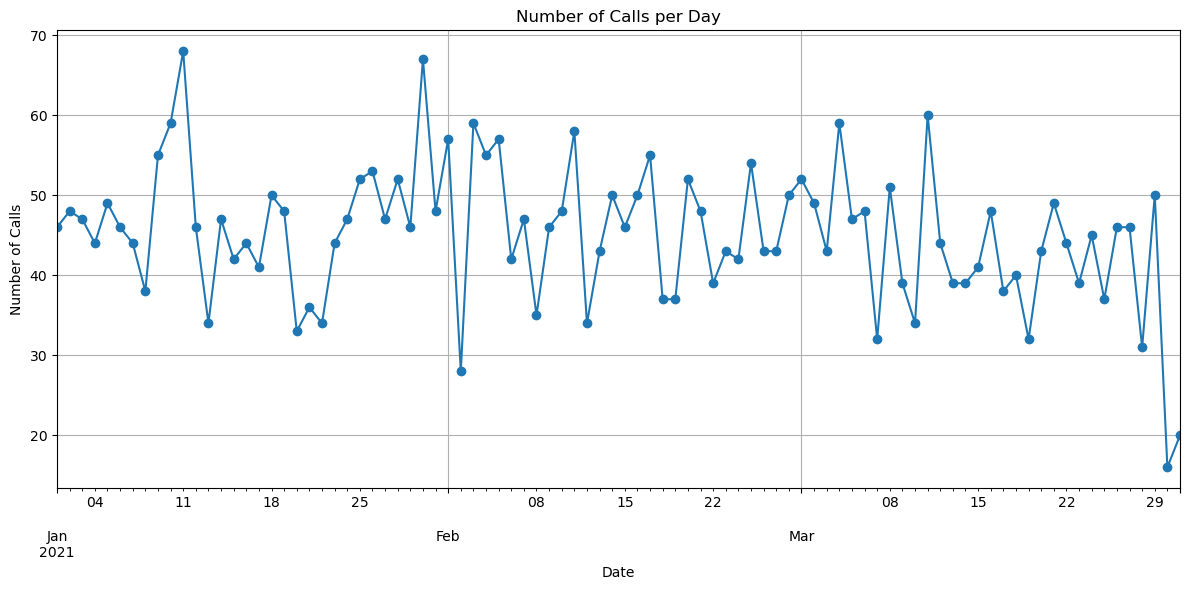

In [25]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Count calls per day
calls_per_day = df.groupby('Date').size()

# Plot
plt.figure(figsize=(12,6))
calls_per_day.plot(kind='line', marker='o')
plt.title('Number of Calls per Day')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.grid(True)
plt.tight_layout()
plt.show()

** Call Center Performance Summary**
-Call Resolution Rate (CRR): With a CRR of 89.94%, the team demonstrates strong problem-solving capabilities and is likely resolving most issues on the first contact.

-Average Call Duration (ACD): Calls last about 224.92 seconds (~3 minutes 45 seconds), reflecting efficient handling times that contribute to high resolution rates.

-Abandonment Rate: A 0% abandonment rate shows that callers are receiving prompt responses, minimizing frustration and improving service perception.

-Average Hold Time: An average hold time of 67.52 seconds suggests that agents are readily available, supporting the center’s ability to maintain low abandonment rates.

-SLA Adherence: 70% of calls are answered within 90 seconds, indicating reasonable SLA compliance. There may be opportunities to further improve adherence, especially by streamlining post-call tasks.

-Customer Satisfaction: A satisfaction score of 3.4 out of 5 reflects a decent level of service, though there's clear potential to better match the customer experience with the resolution success rate.

